## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
Data = df = pd.read_csv(r"C:\Users\aish2\Downloads\auto-mpg.csv")

## Viewing first few rows

In [5]:
Data.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Exploratory Data Analysis

### Relationship between mpg & acceleration

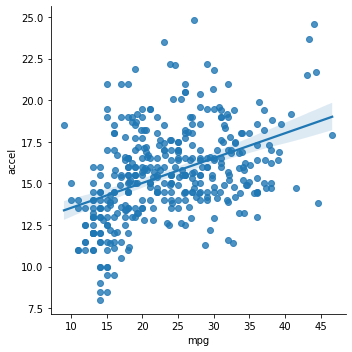

In [6]:
sns.lmplot(x='mpg',y='accel',data=Data)

##### Insight:  We can see that most of the points are not near the regression line thus implying that there is a weak positive correlation between the two variables

In [7]:
Data['mpg'].corr(Data['accel'])

0.4233285369027875

### Relationship between mpg and hp

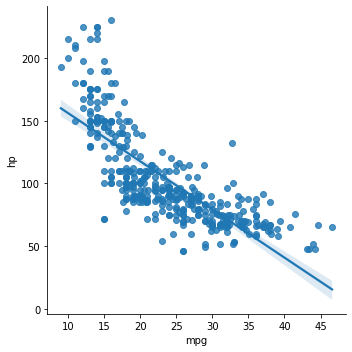

In [8]:
sns.lmplot(x='mpg',y='hp',data=Data)

#### Insight : there is a strong positive correlation between the two variables

In [9]:
Data['mpg'].corr(Data['hp'])

-0.7784267838977759

### Correlation between Relationship between mpg and weight

In [10]:
Data['mpg'].corr(Data['weight'])

-0.8322442148315753

### Correlation between Relationship between mpg and displ

In [11]:
Data['mpg'].corr(Data['displ'])

-0.8051269467104577

### Correlation between Relationship between mpg and cyl

In [12]:
Data['mpg'].corr(Data['cyl'])

-0.7776175081260216

## Removing Unnecessary Columns

##### The column that contains the names of cars is not going to be used in the model so I removed that column. The dataset now contains 8 columns.

In [13]:
df=Data.drop('name',axis=1)
df

,mpg,cyl,displ,hp,weight,accel,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1
388,44.0,4,97.0,52,2130,24.6,82,2
389,32.0,4,135.0,84,2295,11.6,82,1
390,28.0,4,120.0,79,2625,18.6,82,1


## Dealing with Categorical Values

### Replaced 1 with America, 2 with Europe, and 3 with Japan.

In [14]:
df['origin']=df['origin'].replace({1:'America',2:'Europe',3:'Asia'})
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


### Using Get dummies function

##### We only need columns that contain numerical data in it. The column origin violates this. Therefore, something needs to be done to solve this. This is where the ‘get_dummies’ function comes into the picture. This function will pick the different categories within the column of interest and create a column name in the format- ‘original column name_category’. Then, as soon as it encounters a particular column, it will mark that as 1 while the other two columns will be marked as 0

In [15]:
df=pd.get_dummies(df,columns=['origin'])
df

,mpg,cyl,displ,hp,weight,accel,yr,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,0,0
388,44.0,4,97.0,52,2130,24.6,82,0,0,1
389,32.0,4,135.0,84,2295,11.6,82,1,0,0
390,28.0,4,120.0,79,2625,18.6,82,1,0,0


## Dealing with missing values

##### Some ways to handle missing values include -filling missing values with mean median or mode, dropping the rows that contain missing values. Dropping any data points should be our last option, as we could lose a lot of important information by doing this.

##### I first checked if there are any missing values using the isna() function. Along with this, I am using the sum function to count the number of NaNs if there are any.

In [16]:
df.isna().sum()

mpg               0
cyl               0
displ             0
hp                0
weight            0
accel             0
yr                0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

##### From the output, it is evident that there are no missing values. I then checked the datatypes to confirm if what I saw is right or not. The dtypes function can be used to determine the data type of each of the columns.

In [17]:
df.dtypes

mpg               float64
cyl                 int64
displ             float64
hp                  int64
weight              int64
accel             float64
yr                  int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

##### We can see the kind of values that each column has and confirm it with the above output. All of the datatypes seem to be fine.

## Multivariate Plots

##### Used the pairplot function to interpret the relationship between the variables in our dataset. Upon using only the first 7 columns (as the last 3 columns are not required for plotting graphs), I get the following pairplots.

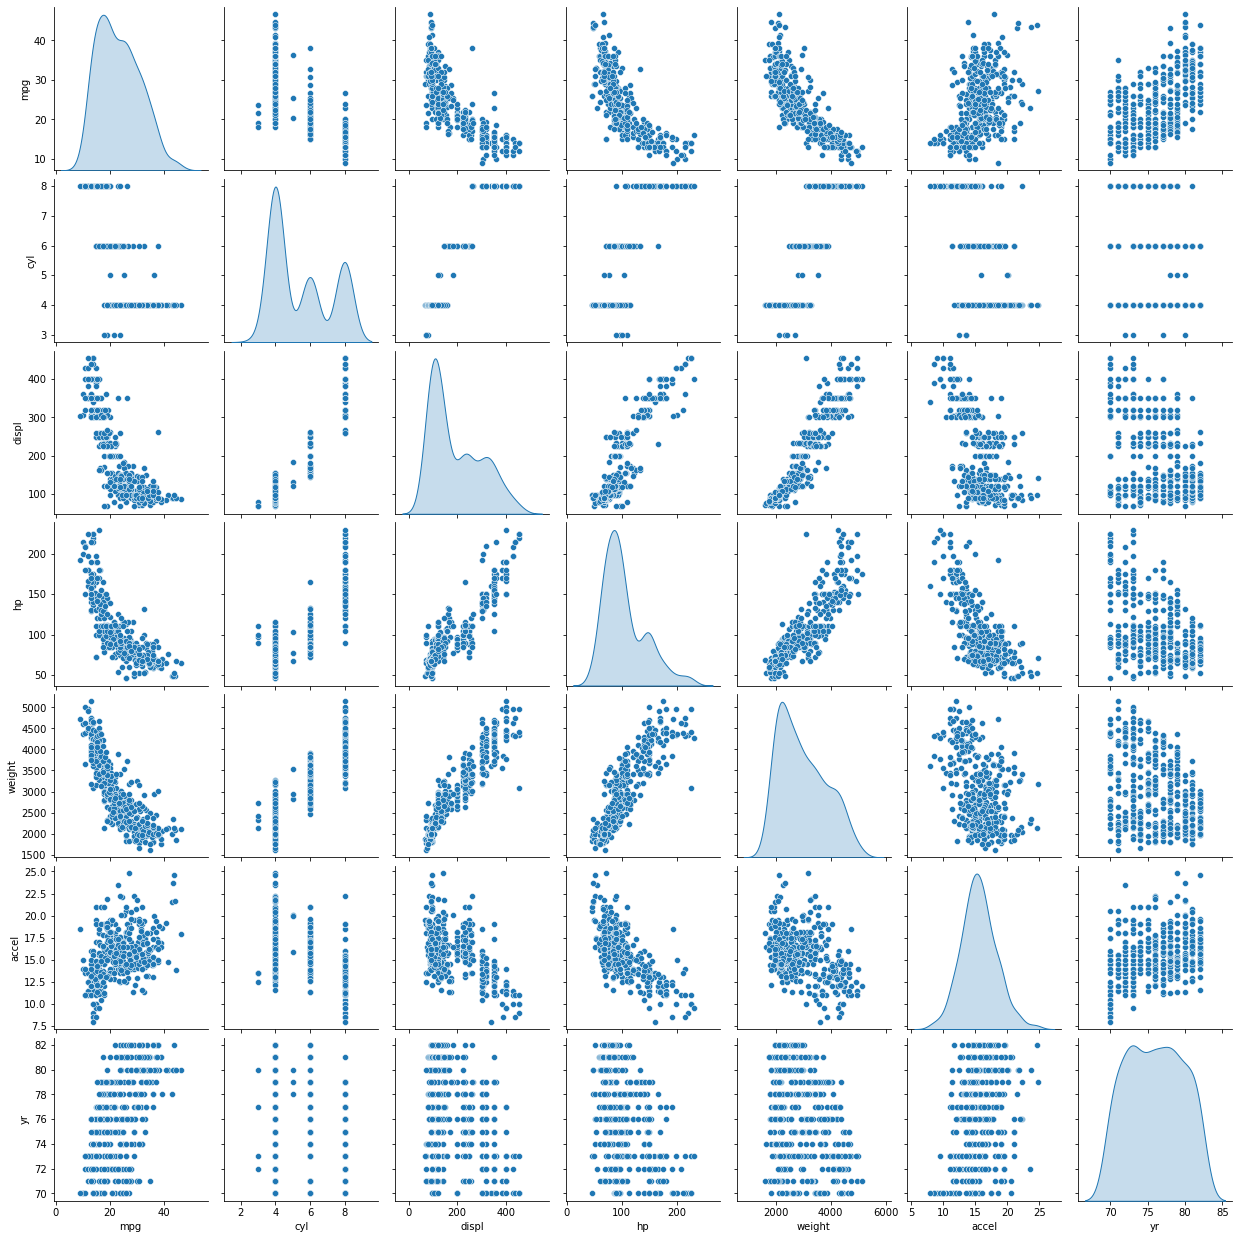

In [18]:
attr_select=df.iloc[:,0:7]
sns.pairplot(attr_select,diag_kind='kde')

##### Another important point to note is that in any pairplot , whatever inference we get from the upper half of the plot is the same as the one that we get from the lower half of the curve. So, you can consider either side of the diagonal for interpretation purposes.

## Building the Model

### Dividing the data into dependent and independent variables

##### The first thing that is to be done is to divide the data into dependent and independent variables. In our dataset, we would like to predict the values of “mpg” and this mpg depends upon all the other attributes such as cylinders, horsepower etc. Therefore mpg is our dependent variable while the other variables are independent.

In [19]:
X= df.drop(['mpg'],axis=1)
y= df[['mpg']]

### Splitting the dataset into training and testing data

##### Then I split the data into training and testing data with 30% of the data in the testing dataset and the rest in the training dataset. The data points in X that are going to be used in training are stored in X_train and those that are going to be used in testing are stored in X_test. Similarly, I stored the data points of Y in Y_train and Y_test. I also set a random seed to ensure that the random data that is stored in training and testing variable remains the same every time I run the code.

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.30, random_state=1)

### Making the Model Learn

##### The final thing that is left to do is to make my model learn from the training dataset. Upon initializing the model, I made the model learn from X_train and y_train using the ‘fit’ function.

In [21]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

##### The equation of the dataset is in the form of - Y=m1x1+m2x2+m3x3+.….C ( till the last column of the dataset). I used the ‘coef_’ function to get the values of coefficients of various columns.

In [22]:
regression_model.coef_

array([[-2.32509254e-01,  2.45825956e-02, -1.48890324e-03,
        -7.61188242e-03,  2.80132661e-01,  7.74684971e-01,
        -1.77314559e+00,  9.47250347e-01,  8.25895242e-01]])

##### I used the intercept_ function to find the value of y-intercept

In [23]:
intercept=regression_model.intercept_[0]
intercept

-19.750891123310257

##### The equation is mpg = -0.23250(cyl)+0.0245(dis)-0.0014(hp)…-19.75 Once we input the values of the variables, the target variable-mpg will be predicted. Therefore, a mathematical model has been built to establish a relationship between the target variable-‘mpg’ and other variables.

### Score of the model

In [24]:
Training_data_score=regression_model.score(X_train,y_train)
Testing_data_score=regression_model.score(X_test,y_test)
print('Score of training data is :' + str(Training_data_score))
print('Score of testing data is :' + str(Testing_data_score))

Score of training data is :0.8205337631867141
Score of testing data is :0.8242172817490033


##### The training data has a score of 82% , which is pretty decent. On the other hand, the testing data’s score tells how well the data has been able to learn from the training dataset. The testing data has a score of 82.4% , which is good enough but it could have been slightly better.

### Predicting the target value

##### The final thing that is left to do is to predict the value of ‘mpg’ for data points present in the X_test. The model has learnt from several cars present in the training dataset and now it's time to use whatever it has learnt to give the required predicted results. I used the predict function to do the same.

In [25]:
regression_model.predict(X_test)

array([[23.83567423],
       [28.59726492],
       [32.37736248],
       [22.01588437],
       [35.28019321],
       [28.14163774],
       [26.55945716],
       [12.57219984],
       [25.63744107],
       [32.0953011 ],
       [23.40186073],
       [32.21377673],
       [20.20455071],
       [31.80347979],
       [29.52579591],
       [14.74734514],
       [29.86523971],
       [33.12612966],
       [11.05583483],
       [23.03764967],
       [27.03713766],
       [17.98215689],
       [17.970493  ],
       [16.10744901],
       [10.85311295],
       [20.09330878],
       [31.84106862],
       [18.50652465],
       [21.76656008],
       [28.94836323],
       [21.95017154],
       [24.40318225],
       [10.27943191],
       [28.67974388],
       [20.91743998],
       [14.33883247],
       [17.08346441],
       [21.499123  ],
       [35.17239049],
       [24.59637251],
       [16.31300567],
       [11.94917488],
       [22.42178229],
       [22.36191917],
       [22.15963237],
       [18

In [26]:
X_test

,cyl,displ,hp,weight,accel,yr,origin_America,origin_Asia,origin_Europe
81,4,120.0,97,2506,14.5,72,0,1,0
165,4,97.0,75,2171,16.0,75,0,1,0
351,4,108.0,75,2350,16.8,81,0,1,0
119,4,121.0,112,2868,15.5,73,0,0,1
379,4,91.0,67,1995,16.2,82,0,1,0
...,...,...,...,...,...,...,...,...,...
59,4,140.0,90,2408,19.5,72,1,0,0
12,8,400.0,150,3761,9.5,70,1,0,0
303,4,151.0,90,2670,16.0,79,1,0,0
163,8,262.0,110,3221,13.5,75,1,0,0
